### Volatilidade histórica
A Volatilidade histórica simples é uma forma fácil de se obter uma estimativa de Volatilidade, utiliza-se do desvio padrão
de retornos de períodos determinados. 
Por exemplo, pode-se utilizar retornos diários ou mensais para se obter a Volatilidade anual.

Dada uma lista com os $n$ preços históricos de um ativo, $X$, vamos chamar de $x_i$ o preço de cada dia.

Calculamos a série de log retornos:

$$u_i = ln(\frac{x_i}{x_{i-1}})$$

Agora com a série $U$ de log retornos, vamos calcular seu desvio padrão:

$$\sigma^{2} = \frac{1}{n-1} \sum_{i=1}^{n} (u_i - \bar{u})^2$$

Sendo $\sigma$ a Volatilidade diária do nosso ativo. Podemos multiplicar por $ \sqrt{252}$ para obter a Volatilidade anual.

In [33]:
pd.options.display.float_format = '{:20,.10f}'.format

In [1]:
#primeiro vamos coletar alguns dados

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

# coletando os dados históricos de MGLU3 - 12 meses
stocks = yf.Ticker("MGLU3.SA")
hist = stocks.history(period='12mo')
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-18,24.032572,24.632137,23.892674,24.432283,24257200,0.0,0
2021-01-19,24.522217,24.931920,23.802738,24.062550,21025600,0.0,0
2021-01-20,24.162478,25.511500,24.102522,25.401579,48089300,0.0,0
2021-01-21,25.381592,25.631411,24.831992,25.471527,33038900,0.0,0
2021-01-22,25.111787,26.280940,25.081810,25.971165,43004200,0.0,0
...,...,...,...,...,...,...,...
2022-01-11,5.750000,6.010000,5.720000,5.870000,142963700,0.0,0
2022-01-12,5.900000,6.370000,5.780000,6.310000,127342800,0.0,0
2022-01-13,6.250000,6.280000,5.900000,6.090000,129178200,0.0,0


In [4]:
# limpando o dataframe pra ter 1 coluna só
df = hist[['Close']].copy()

# mudar o nome da coluna
df.columns = ['Preco']

# trazer a coluna Date de index para coluna
df.reset_index(inplace=True)

# transforma a coluna Date para formato data
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Preco
0,2021-01-18,24.432283
1,2021-01-19,24.062550
2,2021-01-20,25.401579
3,2021-01-21,25.471527
4,2021-01-22,25.971165
...,...,...
243,2022-01-11,5.870000
244,2022-01-12,6.310000
245,2022-01-13,6.090000
246,2022-01-14,6.370000


In [9]:
# criando uma coluna com o preço do dia anterior
df['PD1'] = df['Preco'].shift(1)

# calculando os log retornos
df['LgRet'] = np.log(df['Preco']/df['PD1'] )
df

,Date,Preco,PD1,LgRet
0,2021-01-18,24.432283,NaN,NaN
1,2021-01-19,24.062550,24.432283,-0.015249
2,2021-01-20,25.401579,24.062550,0.054155
3,2021-01-21,25.471527,25.401579,0.002750
4,2021-01-22,25.971165,25.471527,0.019426
...,...,...,...,...
243,2022-01-11,5.870000,5.740000,0.022395
244,2022-01-12,6.310000,5.870000,0.072281
245,2022-01-13,6.090000,6.310000,-0.035488
246,2022-01-14,6.370000,6.090000,0.044951


In [11]:
# calcula o desvio padrão, volatilidade diária
vol1 = df['LgRet'].std()
vol1

0.037213970440772716

In [12]:
# anualiza a volatilidade diária multiplicando raiz de 252 (números de negociação em 1 ano)
vol1 * np.sqrt(252)

0.59075346650156

#### Algumas simplificações:

É possível simplificar um pouco o cálculo se adotarmos algumas premissas:

- A média de retornos é igual a 0
- Usar $n$ ao invés de $n-1$

Com estas alterações, nossa fórmula se torna:

$$\sigma^{2} = \frac{1}{n} \sum_{i=1}^{n} u_i^2$$

Repare que é basicamente uma média simples do quadrado dos retornos.

In [21]:
# vamos ver a média dos retornos
df['LgRet'].mean()
# não é zero, mas é muito próxima

-0.005604628624238067

In [13]:
df

,Date,Preco,PD1,LgRet
0,2021-01-18,24.432283,NaN,NaN
1,2021-01-19,24.062550,24.432283,-0.015249
2,2021-01-20,25.401579,24.062550,0.054155
3,2021-01-21,25.471527,25.401579,0.002750
4,2021-01-22,25.971165,25.471527,0.019426
...,...,...,...,...
243,2022-01-11,5.870000,5.740000,0.022395
244,2022-01-12,6.310000,5.870000,0.072281
245,2022-01-13,6.090000,6.310000,-0.035488
246,2022-01-14,6.370000,6.090000,0.044951


In [14]:
#cálculo o quadrado dos log retornos
quad = df['LgRet']**2
quad

0           NaN
1      0.000233
2      0.002933
3      0.000008
4      0.000377
         ...   
243    0.000502
244    0.005225
245    0.001259
246    0.002021
247    0.001603
Name: LgRet, Length: 248, dtype: float64

In [16]:
#somo os valores quadrados
soma = quad.sum()
soma

0.3484391105256697

In [19]:
# divido a soma por n
n = len(quad)

variancia = soma/n
variancia

0.0014049964134099585

In [20]:
# raiz da variancia para achar o desvio padrão
np.sqrt(variancia)

0.03748328178548349

#### Críticas ao modelo Simples

A crítica óbvia, claro, é que o modelo é simples, ele pressupõe que movimentos acontecidos no passado em momentos
diferentes tem mesmo peso na determinação do futuro. 

$$\sigma^{2} = \sum_{i=1}^{n} \frac{1}{n} u_i^2$$


Por exemplo, se um ativo teve um dia em que seu retorno foi de 9%, 
não haverá diferença caso este dia tenha ocorrido ontem ou há 3 meses.

Vamos tentar evoluir nosso modelo de forma a tentar incorporar algumas soluções.



### 2.2 Média móvel exponencial ponderada EWMA

Para resolver a questão de que dados de dias mais antigos deveriam ter menor influência na Volatilidade, define-se um modelo
que pondera os retornos usando pesos com decaimento exponencial. Ou seja, o dia mais recente tem um peso maior no cálculo e 
os dias anteriores terão pesos menores.

Esse modelo é chamado Exponentially Weighted Moving Average (EWMA) e para controlar estes pesos é introduzido o parâmetro $\lambda$ que é chamado de parâmetro de suavização (smoothing paramenter). 

![Modelos de Volatilidade](E:\gusta\Documents\GitHub\financas\Imagens\14_02_EWMA.png)

Repare na figura que cada retorno utiliza pesos de valores diferentes, determinados por $\lambda$.

De forma que ao considerar todos os pesos teremos:

$$\sigma^{2} = \sum_{i=0}^{n} u_i^2 (1-\lambda)\lambda^i$$



é importante notar a ordem dos índices, que deve ser invertida, o índice 0 será o período mais recente, 1 o do período anterior e assim sucessivamente.

Uma vantagem da EWMA é que ela pode ser calculada de forma recursiva:

$$\sigma_i^{2} = (1-\lambda)u_{i-1}^2 + \lambda \sigma_{i-1}^2$$

O valor de $\sigma^2$ no tempo $i$ é definido pelo valor de $\sigma^2$ no período anterior + o retorno do período anterior, ponderados por $\lambda$.


In [23]:
lam=0.94
# relembrando o dataframe
df

,Date,Preco,PD1,LgRet
0,2021-01-18,24.432283,NaN,NaN
1,2021-01-19,24.062550,24.432283,-0.015249
2,2021-01-20,25.401579,24.062550,0.054155
3,2021-01-21,25.471527,25.401579,0.002750
4,2021-01-22,25.971165,25.471527,0.019426
...,...,...,...,...
243,2022-01-11,5.870000,5.740000,0.022395
244,2022-01-12,6.310000,5.870000,0.072281
245,2022-01-13,6.090000,6.310000,-0.035488
246,2022-01-14,6.370000,6.090000,0.044951


In [24]:
# vamos calcular o retorno ao quadrado
df['u2'] = df['LgRet']**2

In [25]:
# vamos encontrar o índice i de cada período
n = len(df['u2'])

In [30]:
# calculando os i's dos períodos (note que o mais recente (hoje) é o 0)
df['i'] = np.arange(n-1, -1, -1)
df

,Date,Preco,PD1,LgRet,u2,delta,i
0,2021-01-18,24.432283,NaN,NaN,NaN,247,247
1,2021-01-19,24.062550,24.432283,-0.015249,0.000233,246,246
2,2021-01-20,25.401579,24.062550,0.054155,0.002933,245,245
3,2021-01-21,25.471527,25.401579,0.002750,0.000008,244,244
4,2021-01-22,25.971165,25.471527,0.019426,0.000377,243,243
...,...,...,...,...,...,...,...
243,2022-01-11,5.870000,5.740000,0.022395,0.000502,4,4
244,2022-01-12,6.310000,5.870000,0.072281,0.005225,3,3
245,2022-01-13,6.090000,6.310000,-0.035488,0.001259,2,2
246,2022-01-14,6.370000,6.090000,0.044951,0.002021,1,1


In [34]:
# calculando os pesos
df['peso'] = (1-lam) * np.power(lam, df['i'])
df

,Date,Preco,PD1,LgRet,u2,delta,i,peso
0,2021-01-18,24.4322834015,NaN,NaN,NaN,247,247,0.0000000138
1,2021-01-19,24.0625495911,24.4322834015,-0.0152486750,0.0002325221,246,246,0.0000000147
2,2021-01-20,25.4015789032,24.0625495911,0.0541546607,0.0029327273,245,245,0.0000000156
3,2021-01-21,25.4715270996,25.4015789032,0.0027499104,0.0000075620,244,244,0.0000000166
4,2021-01-22,25.9711647034,25.4715270996,0.0194256287,0.0003773551,243,243,0.0000000177
...,...,...,...,...,...,...,...,...
243,2022-01-11,5.8699998856,5.7399997711,0.0223954439,0.0005015559,4,4,0.0468449376
244,2022-01-12,6.3099999428,5.8699998856,0.0722810531,0.0052245506,3,3,0.0498350400
245,2022-01-13,6.0900001526,6.3099999428,-0.0354875607,0.0012593670,2,2,0.0530160000
246,2022-01-14,6.3699998856,6.0900001526,0.0449513448,0.0020206234,1,1,0.0564000000


In [35]:
# soma dos pesos soma 1 no limite
df['peso'].sum()

0.9999997833754404

In [41]:
# verificando os índices i
df.loc[162:172]

,Date,Preco,PD1,LgRet,u2,delta,i,peso
162,2021-09-13,17.4400005341,17.1800003052,0.0150205148,0.0002256159,85,85,0.0003119025
163,2021-09-14,17.0300006866,17.4400005341,-0.0237899141,0.0005659600,84,84,0.0003318111
164,2021-09-15,16.6200008392,17.0300006866,-0.0243696951,0.0005938820,83,83,0.0003529906
165,2021-09-16,16.3700008392,16.6200008392,-0.0151563973,0.0002297164,82,82,0.0003755219
166,2021-09-17,16.5699996948,16.3700008392,0.0121433704,0.0001474614,81,81,0.0003994914
167,2021-09-20,16.0499992371,16.5699996948,-0.0318850110,0.0010166539,80,80,0.0004249908
168,2021-09-21,16.3899993896,16.0499992371,0.0209625535,0.0004394286,79,79,0.0004521179
169,2021-09-22,16.3400001526,16.3899993896,-0.0030552567,0.0000093346,78,78,0.0004809765
170,2021-09-23,15.8699998856,16.3400001526,-0.0291855714,0.0008517976,77,77,0.0005116771
171,2021-09-24,15.6300001144,15.8699998856,-0.0152383756,0.0002322081,76,76,0.0005443373


In [42]:
df

,Date,Preco,PD1,LgRet,u2,delta,i,peso
0,2021-01-18,24.4322834015,NaN,NaN,NaN,247,247,0.0000000138
1,2021-01-19,24.0625495911,24.4322834015,-0.0152486750,0.0002325221,246,246,0.0000000147
2,2021-01-20,25.4015789032,24.0625495911,0.0541546607,0.0029327273,245,245,0.0000000156
3,2021-01-21,25.4715270996,25.4015789032,0.0027499104,0.0000075620,244,244,0.0000000166
4,2021-01-22,25.9711647034,25.4715270996,0.0194256287,0.0003773551,243,243,0.0000000177
...,...,...,...,...,...,...,...,...
243,2022-01-11,5.8699998856,5.7399997711,0.0223954439,0.0005015559,4,4,0.0468449376
244,2022-01-12,6.3099999428,5.8699998856,0.0722810531,0.0052245506,3,3,0.0498350400
245,2022-01-13,6.0900001526,6.3099999428,-0.0354875607,0.0012593670,2,2,0.0530160000
246,2022-01-14,6.3699998856,6.0900001526,0.0449513448,0.0020206234,1,1,0.0564000000


In [44]:
df['pre_vol'] = df['peso'] * df['u2']
df

,Date,Preco,PD1,LgRet,u2,delta,i,peso,pre_vol
0,2021-01-18,24.4322834015,NaN,NaN,NaN,247,247,0.0000000138,NaN
1,2021-01-19,24.0625495911,24.4322834015,-0.0152486750,0.0002325221,246,246,0.0000000147,0.0000000000
2,2021-01-20,25.4015789032,24.0625495911,0.0541546607,0.0029327273,245,245,0.0000000156,0.0000000000
3,2021-01-21,25.4715270996,25.4015789032,0.0027499104,0.0000075620,244,244,0.0000000166,0.0000000000
4,2021-01-22,25.9711647034,25.4715270996,0.0194256287,0.0003773551,243,243,0.0000000177,0.0000000000
...,...,...,...,...,...,...,...,...,...
243,2022-01-11,5.8699998856,5.7399997711,0.0223954439,0.0005015559,4,4,0.0468449376,0.0000234954
244,2022-01-12,6.3099999428,5.8699998856,0.0722810531,0.0052245506,3,3,0.0498350400,0.0002603657
245,2022-01-13,6.0900001526,6.3099999428,-0.0354875607,0.0012593670,2,2,0.0530160000,0.0000667666
246,2022-01-14,6.3699998856,6.0900001526,0.0449513448,0.0020206234,1,1,0.0564000000,0.0001139632


In [47]:
# somando a coluna e tirando a raiz pra econtrar a vol
soma = df['pre_vol'].sum()
vol3 = np.sqrt(soma)
vol3 

0.05155811457236033

In [50]:
# anualizado
vol3 * np.sqrt(252)

0.8184596953550443

<AxesSubplot:>

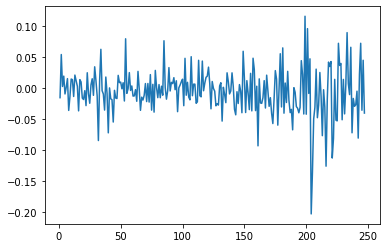

In [51]:
df['LgRet'].plot()

In [54]:
lam = 0.94

def ewma(dataframe, lam):
    # fazer uma cópia por causa dos warnings do pandas
    df = dataframe.copy()
    # calcular o quadrado do log retorno
    df['u2'] = df['LgRet']**2
    #encontro os i's 
    n = len(dataframe)
    df['i'] = np.arange(n-1 ,-1, -1)
    # calculo os pesos do lambda
    df['peso'] = (1-lam) * np.power(lam, df['i'])
    # multiplico os pesos por u2
    df['pre_vol'] = df['peso'] * df['u2']
    # somo pre_vol e tiro a raiz
    vol3 = df['pre_vol'].sum()
    vol3 = np.sqrt(vol3)
    
    return vol3

In [60]:
ewma(df[['LgRet']], 0.94)

0.05155811457236033

In [62]:
#usando a fórmula ewm do pandas
df[['LgRet']].ewm(alpha=0.94, adjust=False).std()

,LgRet
0,NaN
1,NaN
2,0.0024084115
3,0.0012558185
4,0.0001707939
...,...
243,0.0049750580
244,0.0018486606
245,0.0055432442
246,0.0030735530


In [63]:
# o mesmo do começo para pegar os dados, mas agora 24 meses
stocks = yf.Ticker("MGLU3.SA")
hist = stocks.history(period="24mo")

#apenas separando a coluna "close" e calculando os log retornos
df = hist[['Close']].copy()
df.columns = ['Preco']
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime( df['Date'])
df['PD1'] = df['Preco'].shift(1)
df['LgRet'] = np.log(df['Preco']/df['PD1'])
df

,Date,Preco,PD1,LgRet
0,2020-01-17,13.2539234161,NaN,NaN
1,2020-01-20,13.6562967300,13.2539234161,0.0299070987
2,2020-01-21,13.6343488693,13.6562967300,-0.0016084534
3,2020-01-22,13.5806999207,13.6343488693,-0.0039425994
4,2020-01-23,13.7977380753,13.5806999207,0.0158550098
...,...,...,...,...
490,2022-01-11,5.8699998856,5.7399997711,0.0223954439
491,2022-01-12,6.3099999428,5.8699998856,0.0722810531
492,2022-01-13,6.0900001526,6.3099999428,-0.0354875607
493,2022-01-14,6.3699998856,6.0900001526,0.0449513448


In [64]:
ewma_hist = []
vol_hist = []

# vamos fazer um for para calcular vários valores anteriores das volatilidades
# salvando os resultados nas listas acima
# o range tem 495 pois o nosso dataframe tem 495 períodos, vamos usar janelas de 252 períodos
for i in range(495):
    if i+252 < 495:
        ewma_hist.append( ewma(df.loc[i:i+252], lam ) )
        vol_hist.append(df.loc[i:i+252]['LgRet'].std())

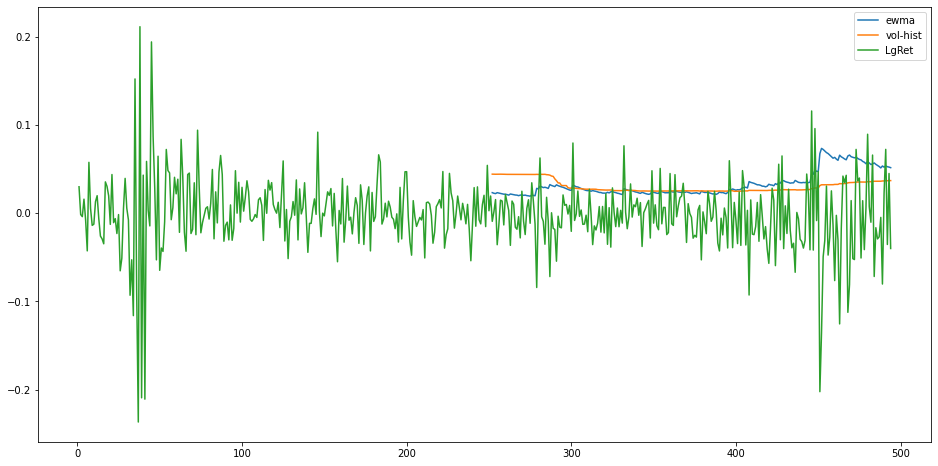

In [67]:
# vamos plotar os resultados
plt.figure(figsize=(16,8))

# plot das vols, np.arange para deslocar os gráficos para a posição em x correta
plt.plot(np.arange(252, 243+252, 1), ewma_hist, label='ewma')

plt.plot(np.arange(252, 243+252, 1), vol_hist, label='vol-hist')

plt.plot(df['LgRet'], label='LgRet')

plt.legend()

plt.show()

In [76]:
ewma_hist = []
vol_hist = []
# vamos comparar usando uma janela de 80 dias

# vamos fazer um for para calcular vários valores anteriores das volatilidades
# salvando os resultados nas listas acima
# o range tem 495 pois o nosso dataframe tem 495 períodos, vamos usar janelas de 80 períodos
for i in range(495):
    if i+80 < 495:
        ewma_hist.append( ewma(df.loc[i:i+80], lam ) )
        vol_hist.append(df.loc[i:i+80]['LgRet'].std())

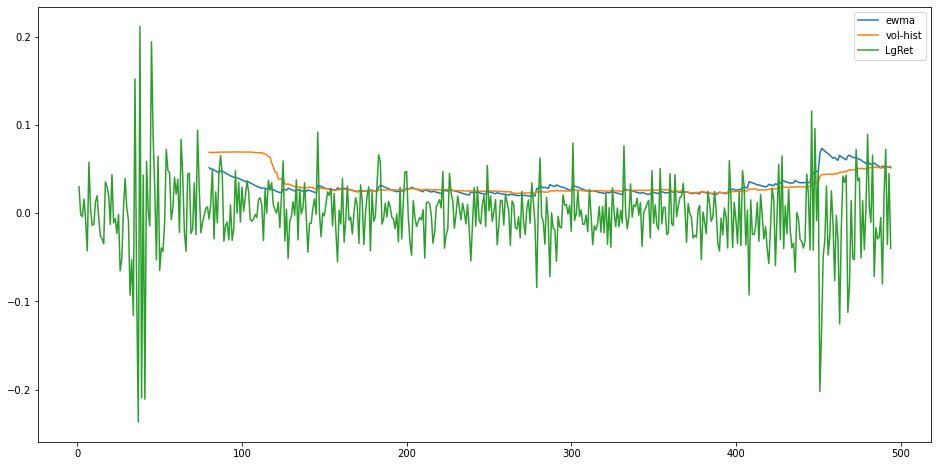

In [77]:
# vamos plotar os resultados
plt.figure(figsize=(16,8))

# plot das vols, np.arange para deslocar os gráficos para a posição em x correta
plt.plot(np.arange(80, 495, 1), ewma_hist, label='ewma')

plt.plot(np.arange(80, 495, 1), vol_hist, label='vol-hist')

plt.plot(df['LgRet'], label='LgRet')

plt.legend()

plt.show()

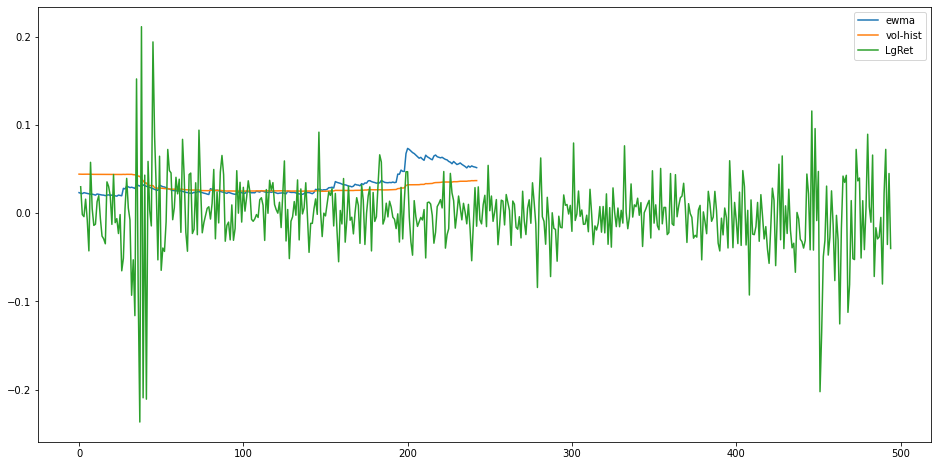

In [69]:
# o que acontece se não deslocarmos os gráficos com np.arange
plt.figure(figsize=(16,8))

plt.plot( ewma_hist, label='ewma')

plt.plot( vol_hist, label='vol-hist')

plt.plot(df['LgRet'], label='LgRet')

plt.legend()

plt.show()

## 3. Volatilidade Implícita (IV)

Sabemos que o valor de um ativo é reflexo do consenso dos participantes com relação ao seu desempenho esperado.
E que podemos considerar até certo ponto que os mercados são eficientes. Então seria possível usar o próprio mercado para 
estimar a Volatilidade do ativo?


Vamos lembrar da equação de Black-Scholes-Merton (BSM) para o preço de uma call/put europeia.


$$  c = S_0 N(d_1) - K e^{-rT} N(d_2) $$

e 

$$ p = K e^{-rT} N(-d_2) - S_0 N(-d_1) $$

Onde:

$$ d_1 = \frac{ ln(S_0/K) + (r + \sigma^2/2) T }{ \sigma \sqrt T} $$

$$ d_2 = \frac{ ln(S_0/K) + (r - \sigma^2/2) T }{ \sigma \sqrt T} = d_1 - \sigma \sqrt T $$

Em que:

A função *N(x)* é a função de distribuição de probabilidade cumulativa para uma variável com distribuição normal padrão. 

- As variáveis *c* e *p* são o preço da opção de compra e da de venda europeias, 
*S_0* é o preço da ação no tempo zero, 
- *K* é o preço de exercício (*strike*), 
- *r* é a taxa de juros livre de risco com capitalização contínua,
- $\sigma$ é a volatilidade do preço da ação e 
- *T* é o tempo até a maturidade da opção.

Perceba que os preços das opções dependem de $\sigma$, um valor de volatividade para o ativo objeto.

Ao invés de usar BSM para obter o preço da opção, nós podemos usar os preços de mercado de uma opção para estimar a Volatilidade que gerou tal preço.

O processo não é simples pois seria difícil isolar $\sigma$ em BSM. Mas é possível usar etapas de otimização da função 
BSM variando $\sigma$ até obter um valor aproximado da opção e dessa forma, usar retornar o $\sigma$.

In [5]:
# calculando o valor da taxa selic (9,25%) em log retorno
r = np.log(1 + 0.0925)
r

0.08846864798760819

In [6]:
#MGLU3
# valores de uma opção call de MGLU3 com vencimento daqui a 5 dias
print('taxa livre de risco', r)
print('tipo da opção: call')
print('preço da ação', 6.33)
print('preço da opção', 0.06)
print('Strike', 6.99)
print('Tempo', 5/252)

taxa livre de risco 0.08846864798760819
tipo da opção: call
preço da ação 6.33
preço da opção 0.06
Strike 6.99
Tempo 0.01984126984126984


In [9]:
# funcao do Henrique para calcular a vol implícita
# ela faz uma otimização do valor de vol até que o preço da call se aproxime ao preço S_ativo fornecido
# para usar, instanciar a classe BSM passando os parâmetros
#callput = call ou put
# S preço do ativo hoje
# K strike da opção
# r taxa livre anualizada em log retorno
# tau tempo anualizado para o vencimento (dica: usar dias_vencimento/252)
# S_ativo preço da opção hoje

#option = BSM(callput, S, K, r, tau, S_ativo)
#option.vol_impl_()

# exemplo: 
#option = BSM('call', 34.45, 35.66, r, 24/252, S_ativo=1.07 )
#option.vol_impl_()

from   scipy.stats import norm
from   scipy.stats import mvn
import numpy       as     np

class BSM:
    def __init__(self, callput, S, K, r, tau, S_ativo=None):
        self.callput = callput
        self.S = S
        self.K = K
        self.r = r
        self.tau = tau
        self.S_ativo = S_ativo
        self.qrf = r
      
    
    def vol_impl_(self):
        if self.S_ativo is None:
            return 0
        else:
            sigma_aux = (np.sqrt(abs(np.log(self.S / self.K) + self.r * self.tau) *\
                         2 / self.tau))
                
            d1_aux = ((np.log(self.S/self.K) +\
                  (self.qrf + sigma_aux**2 / 2) * self.tau) /\
                  (sigma_aux * np.sqrt(self.tau)))
                
            d2_aux = d1_aux - sigma_aux * np.sqrt(self.tau)
            
            if ((self.callput.lower() == 'c') or (self.callput.lower() == 'call')):
                preco_aux = (self.S * np.exp((self.qrf -  self.r) * self.tau) *\
                             norm.cdf(d1_aux) - self.K * np.exp(-self.r * self.tau) *\
                             norm.cdf(d2_aux))
            elif ((self.callput.lower() == 'p') or (self.callput.lower() == 'put')):
                preco_aux = ((self.K * np.exp(-self.r * self.tau) *\
                             norm.cdf(-d2_aux)) - self.S * np.exp((self.qrf -  self.r) *\
                             self.tau) * norm.cdf(-d1_aux))
                                                                  
            vega_aux = (self.S * np.exp((self.qrf - self.r) * self.tau) * norm.pdf(d1_aux) *\
                        np.sqrt(self.tau))
                
            min_diff = abs(self.S_ativo - preco_aux)
            
            eps = 0.0001
            
            while ((abs(self.S_ativo - preco_aux) >= eps) and (abs(self.S_ativo - preco_aux) <= min_diff)):
                sigma_aux = sigma_aux - (preco_aux - self.S_ativo) / vega_aux
                
                d1_aux = ((np.log(self.S/self.K) +\
                          (self.qrf + sigma_aux**2 / 2) * self.tau) /\
                          (sigma_aux * np.sqrt(self.tau)))
                
                d2_aux = d1_aux - sigma_aux * np.sqrt(self.tau)
                
                if ((self.callput.lower() == 'c') or (self.callput.lower() == 'call')):
                    preco_aux = (self.S * np.exp((self.qrf -  self.r) * self.tau) *\
                                 norm.cdf(d1_aux) - self.K * np.exp(-self.r * self.tau) *\
                                 norm.cdf(d2_aux))
                elif ((self.callput.lower() == 'p') or (self.callput.lower() == 'put')):
                    preco_aux = ((self.K * np.exp(-self.r * self.tau) *\
                                  norm.cdf(-d2_aux)) - self.S * np.exp((self.qrf -  self.r) *\
                                  self.tau) * norm.cdf(-d1_aux))
                                                                       
                vega_aux = (self.S * np.exp((self.qrf - self.r) * self.tau) * norm.pdf(d1_aux) *\
                            np.sqrt(self.tau))
                    
                min_diff = abs(self.S_ativo - preco_aux)
                
            if abs(self.S_ativo - preco_aux) <= eps:
                return sigma_aux
            else:
                return 'Não encontrado!'


In [12]:
# aqui instanciamos e calculamos a vol implicita dessa opção
# o resulta é 33,6%
option = BSM('call', 34.45, 35.66, r, 25/252, S_ativo=1.07 )
option.vol_impl_()

0.336734053267024